# Running problem

In [1]:
import pyvista as pv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

um_view_dir='/mofem_install/um_view'
bin_dir=um_view_dir + '/bin'
working_dir=um_view_dir + '/nonlinear_elasticity'
data_dir=working_dir + '/examples/dam'

accelartion_file=data_dir+'/accelerogram.in'
time_history_file=data_dir+'/dam_history.in'
block_data_file=data_dir+'/block_data.in'
mesh_file=data_dir+'/dam.h5m'

print(accelartion_file)
print(time_history_file)
print(block_data_file)
print(mesh_file)

plt.rcParams['figure.figsize'] = [15, 10]

/mofem_install/um_view/nonlinear_elasticity/examples/dam/accelerogram.in
/mofem_install/um_view/nonlinear_elasticity/examples/dam/dam_history.in
/mofem_install/um_view/nonlinear_elasticity/examples/dam/block_data.in
/mofem_install/um_view/nonlinear_elasticity/examples/dam/dam.h5m


# Edit acceleration

In this example we solving problem of structure excitation by earth acceleration, i.e. earthquake. As a input user have to provide t.

Open and edit text file [accelerogram.in](http://127.0.0.1:8888/edit/um_view/nonlinear_elasticity/examples/dam/accelerogram.in). You can edit file and upload your own data representing some historic earth quake event.

Interpretation of text file:
- Column 1: Time
- Column 2: Acceleration in X-direction
- Column 3: Acceleration in Y-direction
- Column 4: Acceleration in Z-direction

# Excitation 

I some cases additional external forces can check in time, for example hydrostatic pressure of water acting on the dam. 

Open and edit text file [dam_history.in](http://127.0.0.1:8888/edit/um_view/nonlinear_elasticity/examples/dam/dam_history.in).

Interpretation of text file:
- Column 1: Time
- Column 2: Load factor

# Block and properties

Elements on the mesh are grouped in blocks, and blocks can have attached attributes and names. In this particular case, in block_1 are elements represent concrete arch dame. You can set approximation order, elastic material parameters for concrete, parameters for physical damping for (Kelvin–Voigt material)[https://en.wikipedia.org/wiki/Kelvin–Voigt_material].  Finally one can set density of material. 


Open and edit text file [block_data.in](http://127.0.0.1:8888/edit/um_view/nonlinear_elasticity/examples/dam/block_data.in).

In [2]:
print(accelartion_file)
!cat {accelartion_file}

print()
print(time_history_file)
!cat {time_history_file}

print()
print(block_data_file)
!cat {block_data_file}

/mofem_install/um_view/nonlinear_elasticity/examples/dam/accelerogram.in
0.00     0   0     0
0.01     0   2     0
0.02     0   -2     0
0.03     0   2     0
0.04     0   -2     0
0.05     0   2     0
0.06     0   -2     0
0.07     0   2     0
0.08     0   0     0
1000     0   0     0

/mofem_install/um_view/nonlinear_elasticity/examples/dam/dam_history.in
0     1.
1000  1.

/mofem_install/um_view/nonlinear_elasticity/examples/dam/block_data.in
# Block numbers block_1, block_3 and block_6 corespond to block sets in Cubit
# journal file.

# Arbitrary order of approx. for blockset
[block_1]
displacemet_order = 1

# Elastic material
[block_1]
# Elastic material properties. Possible materials are NEOHOOKEAN, HOOKE,
# KIRCHHOFF or any other added by user.
material = HOOKE
# Unit N/cm^2
young_modulus = 2.6e+4
poisson_ratio = 0.2

# Damper
[block_3]
# eta = 0.04, value eta*G=eta*E/2*(1+nu)
# Unit N/(cm^3 * s)
dashG = 312
# Only shear damping, damping bulk modulus = 0 when dashpot poison ratio

# Running code

In [3]:
NumberOfProcessors=4
final_time=1.5
time_step=0.01
spectral_radius=0.5

# Using -my_output_prt -1, each time step is post-processed. In some cases
# every n-th step can be save on hard-drive, then set -my_output_prt -2, if
# every \em even you like to save. If option number is positive in addition
# restart file is saved, this allow to kick-start calculations from last
# converged step.
output_every_step=-5

log_file=data_dir+'/log'

!cd {data_dir} && rm -f out_values*.*

!cd {data_dir} && \
{bin_dir}/mpirun --allow-run-as-root -np {NumberOfProcessors} {working_dir}/nonlinear_dynamics \
-my_file {mesh_file} \
-my_time_data_file {time_history_file} \
-my_accelerogram {accelartion_file} \
-ts_dt {time_step} \
-ts_final_time {final_time} \
-ts_max_snes_failures -1 \
-ts_alpha_radius {spectral_radius} \
-my_solve_at_time_zero 1 \
-my_output_prt {output_every_step} \
-my_max_post_proc_ref_level 0 \
-my_disp_order 1 \
-default_material HOOKE \
-is_linear \
-snes_lag_jacobian 1 \
-elastic_material_configuration {block_data_file} \
-log_no_color \
-options_suppress_deprecated_warnings \
2>&1 | tee {log_file}

[0] <inform> MoFEM version 0.10.1 (MOAB 5.2.1 Petsc Release Version 3.11.4, Sep, 28, 2019 )
[0] <inform> git commit id SHA1-NOT FOUND
[0] <inform> Local time: 2021-1-16 15:40:44
[0] <inform> UTC time: 2021-1-16 15:40:44
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316872 type BLOCKSET MAT_ELASTICSET msId 1 name MAT_ELASTIC_DAM block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 3
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316873 type BLOCKSET UNKNOWNNAME msId 3 name DAMPER_DAM block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 3
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316874 type BLOCKSET BODYFORCESSET msId 6 name BODY_FORCES block header:  blockCol = 4294967295 blockMat = 0 blockDimension = 3
[0] <inform> [MeshsetsManager] read cubit meshset 12682136550675316875 type NODESET DISPLACEMENTSET msId 1
[0] <inform> [FieldCore] Add field MESH_NODE_POSITIONS field_id 1 space H1 approximation base A

/mofem_install/um_view/nonlinear_elasticity/examples/dam


[Text(0.5, 0, 'time (s)'),
 Text(0, 0.5, 'Energy'),
 Text(0.5, 1.0, 'Energy in time')]

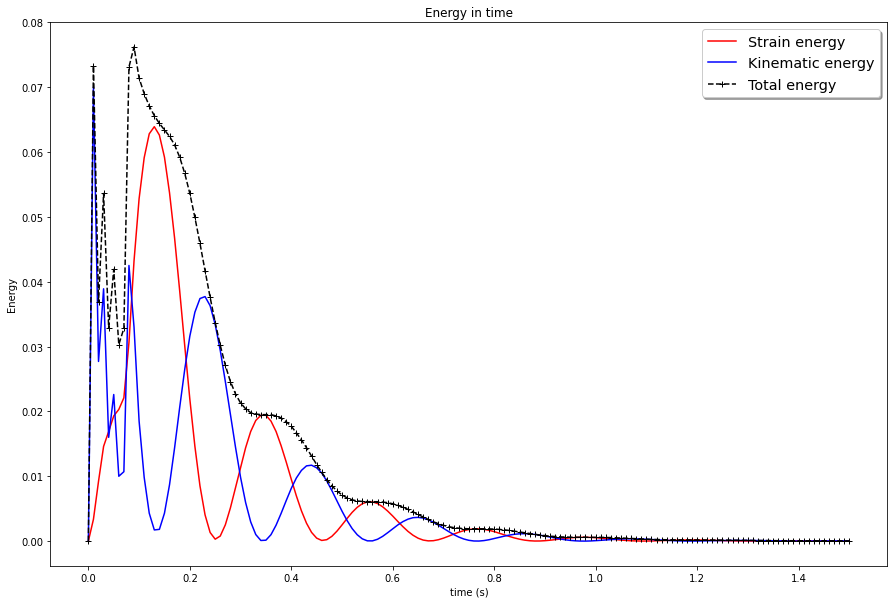

In [4]:
energy_log=data_dir+'/energy_log'
%cd {data_dir}
!grep "Kinetic Energy" {log_file} > {energy_log}
data=pd.read_csv(energy_log,sep='\s+',header=None)
#print(data)

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(data[5].to_numpy(), data[8].to_numpy(), 'r-', label='Strain energy')
ax.plot(data[5].to_numpy(), data[11].to_numpy(), 'b-', label='Kinematic energy')
ax.plot(data[5].to_numpy(), data[13].to_numpy(), 'k+--', label='Total energy')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
ax.set(xlabel='time (s)', ylabel='Energy',
       title='Energy in time')

In [5]:
%cd {data_dir}
list_of_files=!ls -c1 out*h5m
for f in list_of_files:
    !{bin_dir}/mbconvert {f} {f}.vtk

/mofem_install/um_view/nonlinear_elasticity/examples/dam
Read "out_values_150.h5m"
Wrote "out_values_150.h5m.vtk"
Read "out_values_145.h5m"
Wrote "out_values_145.h5m.vtk"
Read "out_values_140.h5m"
Wrote "out_values_140.h5m.vtk"
Read "out_values_135.h5m"
Wrote "out_values_135.h5m.vtk"
Read "out_values_130.h5m"
Wrote "out_values_130.h5m.vtk"
Read "out_values_125.h5m"
Wrote "out_values_125.h5m.vtk"
Read "out_values_120.h5m"
Wrote "out_values_120.h5m.vtk"
Read "out_values_115.h5m"
Wrote "out_values_115.h5m.vtk"
Read "out_values_110.h5m"
Wrote "out_values_110.h5m.vtk"
Read "out_values_105.h5m"
Wrote "out_values_105.h5m.vtk"
Read "out_values_100.h5m"
Wrote "out_values_100.h5m.vtk"
Read "out_values_95.h5m"
Wrote "out_values_95.h5m.vtk"
Read "out_values_90.h5m"
Wrote "out_values_90.h5m.vtk"
Read "out_values_85.h5m"
Wrote "out_values_85.h5m.vtk"
Read "out_values_80.h5m"
Wrote "out_values_80.h5m.vtk"
Read "out_values_75.h5m"
Wrote "out_values_75.h5m.vtk"
Read "out_values_70.h5m"
Wrote "out_value

In [6]:
my_cmap = plt.cm.get_cmap("jet", 24)
nb_steps=!ls -c1 out*h5m.vtk | wc -l
nb_steps=int(nb_steps[0])
print(nb_steps)

file='out_values_%d.h5m.vtk' % (50)
mesh = pv.read(file)

# Scale displacements
scale_factor=2e4
#mesh=mesh.warp_by_vector('DISPLACEMENT',factor=scale_factor)

# Create a plotter object 
plotter = pv.Plotter()
plotter.add_mesh(mesh, scalars='DISPLACEMENT', smooth_shading=False)

print('Orient the view, then press "q" to close window and produce movie')

# setup camera and close
plotter.show(auto_close=False)

# Open a gif
out_gif=data_dir+'/dam.gif'
plotter.open_gif(out_gif)

list_of_files=!ls -c1 out*h5m.vtk
for f in list_of_files:
    print('Render file ',f)
    mesh_step=pv.read(f)
    mesh_step=mesh_step.warp_by_vector('DISPLACEMENT',factor=scale_factor)
    plotter.update_coordinates(mesh_step.points, render=True)
    plotter.write_frame()  # this will trigger the render
    
# Close movie and delete object
plotter.close()
       

31
Orient the view, then press "q" to close window and produce movie


ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

Render file  out_values_0.h5m.vtk
Render file  out_values_5.h5m.vtk
Render file  out_values_10.h5m.vtk
Render file  out_values_15.h5m.vtk
Render file  out_values_20.h5m.vtk
Render file  out_values_25.h5m.vtk
Render file  out_values_30.h5m.vtk
Render file  out_values_35.h5m.vtk
Render file  out_values_40.h5m.vtk
Render file  out_values_45.h5m.vtk
Render file  out_values_50.h5m.vtk
Render file  out_values_55.h5m.vtk
Render file  out_values_60.h5m.vtk
Render file  out_values_65.h5m.vtk
Render file  out_values_70.h5m.vtk
Render file  out_values_75.h5m.vtk
Render file  out_values_80.h5m.vtk
Render file  out_values_85.h5m.vtk
Render file  out_values_90.h5m.vtk
Render file  out_values_95.h5m.vtk
Render file  out_values_100.h5m.vtk
Render file  out_values_105.h5m.vtk
Render file  out_values_110.h5m.vtk
Render file  out_values_115.h5m.vtk
Render file  out_values_120.h5m.vtk
Render file  out_values_125.h5m.vtk
Render file  out_values_130.h5m.vtk
Render file  out_values_135.h5m.vtk
Render file  o

![](examples/dam/dam.gif)